In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
digit_mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digit_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


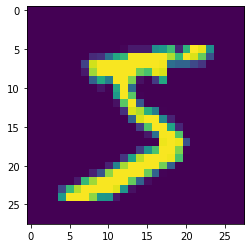

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train[0]

5

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Data Normalization

In [7]:
X_train = X_train/255.
X_test = X_test/255.

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Split the data into train/validation/test datasets
### **Training data**- *used for training the model*
### **Validation data**- *used for tunning hyperparameters and evaluate the models*
### **Test data**- *used to test model after the model has gone through initial vetting by the validation set*

In [9]:
X_train, X_valid = X_train[:55000], X_train[55000:]
y_train, y_valid = y_train[:55000], y_train[55000:]
X_test = X_test

In [10]:
print("X_train shape :",X_train.shape, "\ny_train shape :",y_train.shape,"\nX_valid shape:", X_valid.shape, "\ny_valid shape :", y_valid.shape)
print("X_test shape :", X_test.shape)

X_train shape : (55000, 28, 28) 
y_train shape : (55000,) 
X_valid shape: (5000, 28, 28) 
y_valid shape : (5000,)
X_test shape : (10000, 28, 28)


## Building ANN

In [11]:
np.random.seed(8)
tf.random.set_seed(8)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


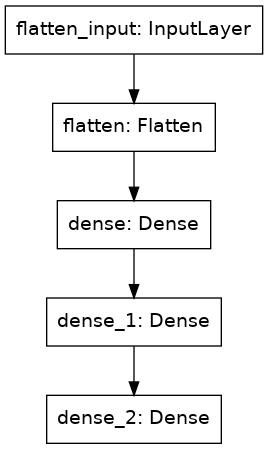

In [14]:
import pydot
keras.utils.plot_model(model)

In [15]:
weights, biases = model.layers[1].get_weights()

In [16]:
len(weights)

784

In [17]:
len(biases)

300

## Compiling the Model

In [18]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [19]:
model_history = model.fit(X_train, y_train, epochs=30,
                         validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9760 - accuracy: 0.7469 - val_loss: 0.2535 - val_accuracy: 0.9322
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2987 - accuracy: 0.9154 - val_loss: 0.1967 - val_accuracy: 0.9462
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2380 - accuracy: 0.9324 - val_loss: 0.1700 - val_accuracy: 0.9546
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2029 - accuracy: 0.9400 - val_loss: 0.1550 - val_accuracy: 0.9586
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1826 - accuracy: 0.9474 - val_loss: 0.1368 - val_accuracy: 0.9660
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1640 - accuracy: 0.9524 - val_loss: 0.1238 - val_accuracy: 0.9684
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1437 - accuracy: 0.9593 - val_loss: 0.1156 - val_accuracy:

In [20]:
model_history.history

{'loss': [0.5858694911003113,
  0.28391483426094055,
  0.2327604442834854,
  0.1995357722043991,
  0.17503128945827484,
  0.1555219143629074,
  0.13954859972000122,
  0.12639828026294708,
  0.1150439977645874,
  0.10521200299263,
  0.09629436582326889,
  0.08887975662946701,
  0.08252297341823578,
  0.07621534168720245,
  0.07108630239963531,
  0.0662284567952156,
  0.06162841245532036,
  0.05772345885634422,
  0.054050832986831665,
  0.05067035183310509,
  0.04725605994462967,
  0.04434572905302048,
  0.04190351441502571,
  0.03946106508374214,
  0.03672963008284569,
  0.03505924716591835,
  0.03270108625292778,
  0.03114054538309574,
  0.02918366715312004,
  0.027621526271104813],
 'accuracy': [0.8491636514663696,
  0.9194727540016174,
  0.9344182014465332,
  0.9423272609710693,
  0.9498727321624756,
  0.9556000232696533,
  0.9605454802513123,
  0.9642545580863953,
  0.9674545526504517,
  0.970018208026886,
  0.9730181694030762,
  0.9750363826751709,
  0.9770363569259644,
  0.9784727

## Ploting Performance

(0.0, 1.0)

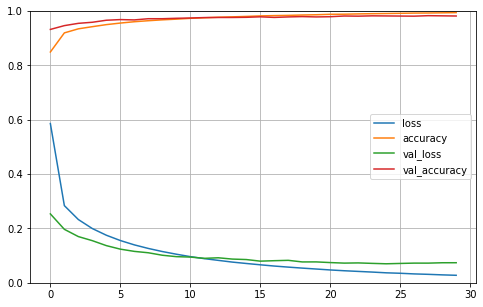

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

## Model Evaluation

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9793


[0.06959787011146545, 0.9793000221252441]

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred[0].round(2)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

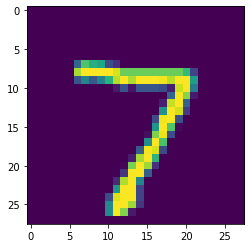

In [25]:
plt.imshow(X_test[0])

In [26]:
X_new = X_test[:3]

In [27]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_pred = model.predict_classes(X_new)
y_pred

array([7, 2, 1])

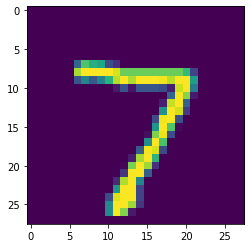

In [29]:
plt.imshow(X_test[0])

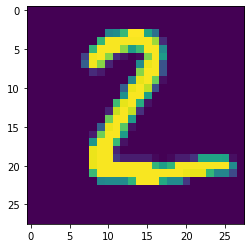

In [30]:
plt.imshow(X_test[1])

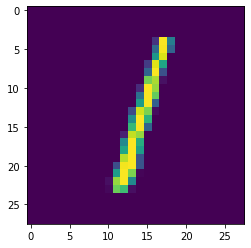

In [31]:
plt.imshow(X_test[2])